# アダマールテスト

**制御ユニタリ演算子$\Lambda(U)$**

→第1量子ビットが$\ket{0}$の場合、何もしない。$\ket{1}$の場合、$U$を作用させる。
$$
    \Lambda(U) = \ket{0}\bra{0} \otimes I +  \ket{1} \bra{1} \otimes U
$$

つまり、条件分岐して「何もしない」または「Uを作用する」という演算

従来のコンピュータでは条件分岐は同時に実行することが出来なかったが、量子コンピュータでは状態の重ね合わせを利用して、条件分岐を**同時並列的に実行することが可能**である。

このアダマールテストの動作について考えていく。最初は簡単のために、量子状態$\ket{\psi}$がユニタリー演算(行列)$U$の固有値$e^{i \lambda}$の固有状態（固有ベクトル）である場合を考える。
$$
    U\ket{psi} = e^{i \lambda} \ket{psi}
$$
1つ目の量子ビットにアダマール演算$H$を作用させることで、
$$
    \frac{1}{\squrt{2}}(\ket{0} + \ket{1}) \otimes \ket{\psi}
$$
が得られる。

アダマール演算は
$$
    H = \frac{\ket{0} + \ket{1}}{\sqrt{2}} \bra{0} + \frac{\ket{0} - \ket{1}}{\sqrt{2}} \bra{1}
$$

# SymPyでの実装
具体的な例として、$U = H$(アダマールゲート)の場合を考えてみる。補助量子ビットを$\ket{0}$、アダマールテストの入力$\ket{\psi}$も$\ket{0}$とする。

In [14]:
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため
from sympy.physics.quantum.gate import X,Y,Z,H,S,T,CNOT,SWAP,CPHASE,CGateS

In [15]:
state = Qubit('00')

# 制御H演算はCGateS()を用いて
ctrlH = CGateS(1, H(0))
represent(ctrlH, nqubits = 2)

/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:12

⎡1  0  0    0  ⎤
⎢              ⎥
⎢0  1  0    0  ⎥
⎢              ⎥
⎢      √2   1  ⎥
⎢0  0  ──   ── ⎥
⎢      2    √2 ⎥
⎢              ⎥
⎢      1   -√2 ⎥
⎢0  0  ──  ────⎥
⎣      √2   2  ⎦

In [18]:
# 測定前の状態は、
value = H(1) * ctrlH * H(1) * state

value

/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:12

In [17]:
# とかけるが、SymPyに計算させてみると、

qapply(value)

となる。第1章で紹介したSymPyの`measure_partial`関数を用いて、1つ目の量子ビットの測定結果が0だった場合の量子状態と確率を求めると、

/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/kaito/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:12

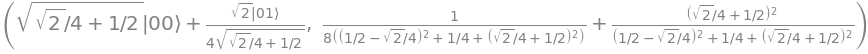

In [19]:
from sympy.physics.quantum.qubit import measure_all, measure_partial, measure_all_oneshot, measure_partial_oneshot
measured_state_and_probability_zero = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[0]
simplify(measured_state_and_probability_zero)

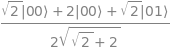

In [20]:
measured_state_zero = measured_state_and_probability_zero[0]
simplify(qapply(H(0)*measured_state_zero))

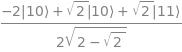

In [21]:
measured_state_one = measure_partial(qapply(H(1)*ctrlH*H(1)*state),(1,))[1][0]
simplify(qapply(H(0)*measured_state_one))